# Wojciech Grabias - WB2
Badanie wpływu początkowych wartości Q_{0} na skuteczność algorytmu optimistic-greedy przy alpha=0.005

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Z gory zakladamy przebieg losowania - cumsum jako symulacja random walk
def generate_reward_array():
	length = 30000
	rnorm_array = np.random.normal(0, 1, length)
	noise = np.concatenate([[0], np.random.normal(0, 0.1, length-1)])
	cumulative_noise = np.cumsum(noise)
	array = rnorm_array + cumulative_noise
	return array

In [58]:
q_optimistic = [1/4, 1/2, 1, 2, 4, 8, 16]
actions = 30000
testbeds = 2000
testbed_rewards_later = []
testbed_rewards_earlier = []
parameter_results_later = []
parameter_results_earlier = []

In [59]:
for q_init in q_optimistic:

	for testbed in range(testbeds):

        # Slowniki informujace o przebiegu gry
		bandits_count = [1] * 10
		bandits_reward_dict = {i: generate_reward_array() for i in range(10)}
		estimate_dict = [q_init for i in range(10)]
		chosen_rewards = []

		for action in range(actions):
            # Wybieramy z ktorego losujemy
			chosen_bandit = np.argmax(estimate_dict)

            # Patrzymy ile juz razy na nim zagralismy
			n = bandits_count[chosen_bandit]
            # Sprawdzamy jaka daje nagrode
			reward = bandits_reward_dict[chosen_bandit][n - 1]

            # Liczymy estymator sredniej Q_{n+1}
			q_n = estimate_dict[chosen_bandit]
			estimate_dict[chosen_bandit] = q_n + 0.005 * (reward - q_n)

            # Zaznaczamy, ze po raz kolejny uzylismy danego slot'a
			bandits_count[chosen_bandit] += 1
			chosen_rewards.append(reward)
        
		testbed_rewards_later.append(np.mean(chosen_rewards[20000:]))
		testbed_rewards_earlier.append(np.mean(chosen_rewards[10000:20000]))
	print(np.mean(testbed_rewards_later))
	parameter_results_later.append(np.mean(testbed_rewards_later))
	parameter_results_earlier.append(np.mean(testbed_rewards_earlier))

12.063494289864517
11.653627057623082
11.397104022858326
11.30228936429073
11.248106912178379
11.246677552692645
11.21421459226158


Text(0.5, 1.0, 'Optimistic greedy average performance')

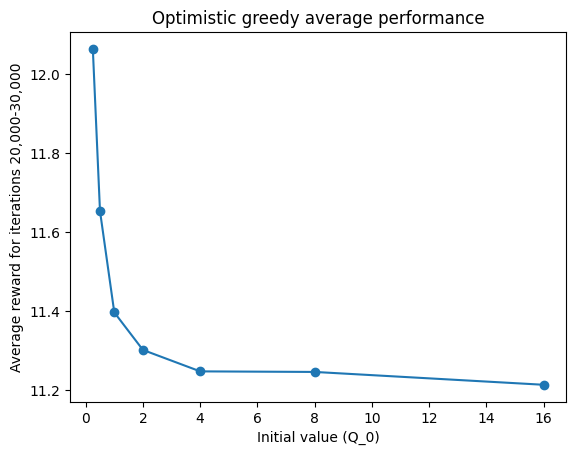

In [60]:
plt.plot(q_optimistic, parameter_results_later, marker='o')

plt.xlabel('Initial value (Q_0)')
plt.ylabel('Average reward for iterations 20,000-30,000')
plt.title('Optimistic greedy average performance')

Text(0.5, 1.0, 'Optimistic greedy average performance')

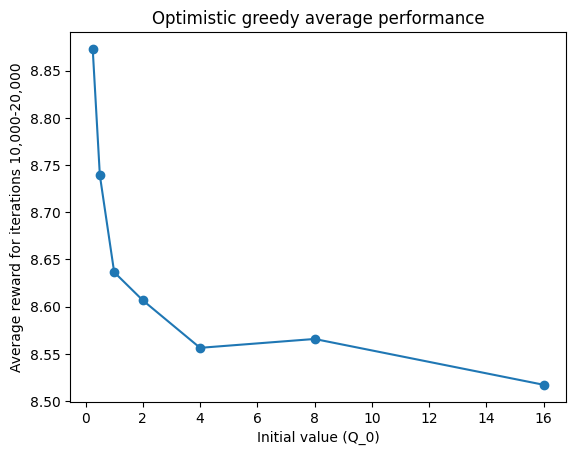

In [61]:
plt.plot(q_optimistic, parameter_results_earlier, marker='o')

plt.xlabel('Initial value (Q_0)')
plt.ylabel('Average reward for iterations 10,000-20,000')
plt.title('Optimistic greedy average performance')